# Active Transport in Amsterdam

Measuring Bikeablity in Amsterdam using:


*   Infrastrucutre quality
*   Bike parkings
*   Greenness



In [ ]:
# installing the main libraries
!pip install googletrans==4.0.0-rc1
!pip3 install geopandas
!apt-get install gdal-bin
!pip install osmnx

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=6aed8ec0bbcc6d9b7751d514686c1c0b94471e40f70fed658fd24f86f378bd5f
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [ ]:
# importing the libraries
import geopandas as gpd
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
import folium
import osmnx as ox
from branca.colormap import linear


In [ ]:
# using amsterdam.nl Geojson maps
pc4_data = 'https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=PC4_BUURTEN&THEMA=postcode'
greenness_data = 'https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=PARKPLANTSOENGROEN&THEMA=stadsparken'
network_data = 'https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=FIETSNETTEN&THEMA=fietsnetten'
buildings_data = ""

In [ ]:
# Load the green areas data
green = gpd.read_file(greenness_data).to_crs(epsg=28992)

# Load the postal code areas data
pc4 = gpd.read_file(pc4_data).to_crs(epsg=28992)

# Load the biking network data
bikenet = gpd.read_file(network_data).to_crs(epsg=28992)

In [ ]:
# looking at the first 5 rows
pc4.head()

Postcode4   Opp_m2                                           geometry
0       1037  1462228  POLYGON ((118866.651 492225.872, 118841.406 49...
1       1041  3274257  POLYGON ((116941.172 492698.909, 116938.510 49...
2       1073   585996  POLYGON ((121324.650 485708.366, 121303.431 48...
3       1074   429512  POLYGON ((121759.102 485689.288, 121764.725 48...
4       1072   593280  POLYGON ((120953.013 485932.016, 120923.819 48...

In [ ]:
bikenet.head()

Label             Soort  Soortcode  \
0      Brom-/Fietspad - 1r - Onbekend    Brom-/Fietspad         11   
1    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan         40   
2    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan         40   
3  Brom-/Fietspad - 1r - Asfalt-Grijs    Brom-/Fietspad         11   
4         Fietspad - 1r - Asfalt-Rood          Fietspad         10   

   Richtingen    Verharding HoofdPlus Stadsdeel  Lengte_m  \
0           1      Onbekend         P         X    128.10   
1           1      Onbekend         P         X     69.95   
2           1      Onbekend         P         X     49.53   
3           1  Asfalt-Grijs         P         X     22.03   
4           1   Asfalt-Rood         P         X     66.78   

                                            geometry  
0  LINESTRING (121720.392 478987.616, 121718.279 ...  
1  LINESTRING (121653.462 479093.626, 121653.758 ...  
2  LINESTRING (121653.462 479093.626, 121648.958 ...  
3  LINESTRING (109403.518 486501.639, 109395.140 ...  
4  LINESTRING (119187.131 479870.846, 119184.222 ...

## Defining the translation functions
To translate the dataframes' data from Dutch to English

In [ ]:
def column_trans(dataframe): #provide the dataframe
  translator = Translator()
  translated_columns = {col: translator.translate(col, src='nl', dest='en').text.lower() for col in dataframe.columns}
  dataframe.rename(columns=translated_columns, inplace = True)
  return dataframe

In [ ]:
def column_values_trans(dataframe, columns_list = []): #provide the list of columns that you want to be translated
  translator = Translator()
  for col in columns_list:
    unique_values = list(dataframe[col].unique())
    translated_values = {val: translator.translate(val, src='nl', dest='en').text.lower() for val in unique_values}
    dataframe[col] = dataframe[col].map(translated_values)
  return dataframe

Translating the bikenet dataset

In [ ]:
pc4.columns = [x.lower() for x in pc4.columns]
#postal_code_gdf = column_values_trans(postal_code_gdf, columns_list = [])
pc4.head()

postcode4   opp_m2                                           geometry
0       1037  1462228  POLYGON ((118866.651 492225.872, 118841.406 49...
1       1041  3274257  POLYGON ((116941.172 492698.909, 116938.510 49...
2       1073   585996  POLYGON ((121324.650 485708.366, 121303.431 48...
3       1074   429512  POLYGON ((121759.102 485689.288, 121764.725 48...
4       1072   593280  POLYGON ((120953.013 485932.016, 120923.819 48...

In [ ]:
bikenet.head()

Label             Soort  Soortcode  \
0      Brom-/Fietspad - 1r - Onbekend    Brom-/Fietspad         11   
1    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan         40   
2    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan         40   
3  Brom-/Fietspad - 1r - Asfalt-Grijs    Brom-/Fietspad         11   
4         Fietspad - 1r - Asfalt-Rood          Fietspad         10   

   Richtingen    Verharding HoofdPlus Stadsdeel  Lengte_m  \
0           1      Onbekend         P         X    128.10   
1           1      Onbekend         P         X     69.95   
2           1      Onbekend         P         X     49.53   
3           1  Asfalt-Grijs         P         X     22.03   
4           1   Asfalt-Rood         P         X     66.78   

                                            geometry  
0  LINESTRING (121720.392 478987.616, 121718.279 ...  
1  LINESTRING (121653.462 479093.626, 121653.758 ...  
2  LINESTRING (121653.462 479093.626, 121648.958 ...  
3  LINESTRING (109403.518 486501.639, 109395.140 ...  
4  LINESTRING (119187.131 479870.846, 119184.222 ...

In [ ]:
bikenet = column_trans(bikenet)
bikenet.head()

label              kind  species code  \
0      Brom-/Fietspad - 1r - Onbekend    Brom-/Fietspad            11   
1    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan            40   
2    Fiets op rijbaan - 1r - Onbekend  Fiets op rijbaan            40   
3  Brom-/Fietspad - 1r - Asfalt-Grijs    Brom-/Fietspad            11   
4         Fietspad - 1r - Asfalt-Rood          Fietspad            10   

   directions     hardening main plus district  length_m  \
0           1      Onbekend         P        X    128.10   
1           1      Onbekend         P        X     69.95   
2           1      Onbekend         P        X     49.53   
3           1  Asfalt-Grijs         P        X     22.03   
4           1   Asfalt-Rood         P        X     66.78   

                                            geometry  
0  LINESTRING (121720.392 478987.616, 121718.279 ...  
1  LINESTRING (121653.462 479093.626, 121653.758 ...  
2  LINESTRING (121653.462 479093.626, 121648.958 ...  
3  LINESTRING (109403.518 486501.639, 109395.140 ...  
4  LINESTRING (119187.131 479870.846, 119184.222 ...

In [ ]:
# translating the "label","kind","hardening" columns content into English
bikenet = column_values_trans(bikenet, columns_list = ["label","kind","hardening"])

## Measuring the infrastructure quality
At this step, we first map each bike lane type into a value, called qulaity score of that bike lane type, based on the indices provided by Schmid et al.(2021)

In [ ]:
# finding the unique values in the kind column
bikenet.kind.unique()

array(['moped/cycle path', 'bike on a roadway', 'bike path',
       'bicycle lane', 'bicycle crossing', 'cycle street',
       'cycle path (without obligation)', 'shared space', 'link',
       'cycle path (moped not allowed)'], dtype=object)

In [ ]:
# assinging weights to each network infrastructre type
bikenet_qulaity = {'cycle street': 7,
                   'bike path' : 10,
                   'cycle path (moped not allowed)' : 8,
                   'bicycle lane' : 6,
                   'shared space' : 3,
                   'bicycle crossing' : 3,
                   'link' : 3,
                   'moped/cycle path' : 9,
                   'cycle path (without obligation)' : 5,
                   'bike on a roadway' : 3
                   }

bikenet['quality_grade'] = bikenet['kind'].map(bikenet_qulaity)

bikenet.head()

label               kind  species code  \
0        moped/cycle path - 1r - unknown   moped/cycle path            11   
1    bicycle on a roadway - 1r - unknown  bike on a roadway            40   
2    bicycle on a roadway - 1r - unknown  bike on a roadway            40   
3  moped/cycle path - 1r - asphalt -gray   moped/cycle path            11   
4        cycle path - 1r - asphalt -rood          bike path            10   

   directions     hardening main plus district  length_m  \
0           1       unknown         P        X    128.10   
1           1       unknown         P        X     69.95   
2           1       unknown         P        X     49.53   
3           1  asphalt-gray         P        X     22.03   
4           1   asphalt-red         P        X     66.78   

                                            geometry  quality_grade  
0  LINESTRING (121720.392 478987.616, 121718.279 ...              9  
1  LINESTRING (121653.462 479093.626, 121653.758 ...              3  
2  LINESTRING (121653.462 479093.626, 121648.958 ...              3  
3  LINESTRING (109403.518 486501.639, 109395.140 ...              9  
4  LINESTRING (119187.131 479870.846, 119184.222 ...             10

Finding the intersection of bikenet and pc4 areas:
we need to first apply spatial join and then

then, we apply map overlay and intersection operation to find the intersection of the bike network in each pc4 polygon(line in polygon operation):

In [ ]:
intersected_segments = gpd.overlay(bikenet, pc4, how='intersection')
intersected_segments['segment_length_m'] = intersected_segments.geometry.length
intersected_segments.head()

label  \
0                    cycle path - 1r - asphalt -rood   
1     cycle path (moped not allowed) - 1r - klinkers   
2  cycle path (not allowed moped) - 2r - asphalt ...   
3                   moped/cycle path - 2r - klinkers   
4     cycle path (moped not allowed) - 2r - klinkers   

                             kind  species code  directions    hardening  \
0                       bike path            10           1  asphalt-red   
1  cycle path (moped not allowed)            13           1       vowels   
2  cycle path (moped not allowed)            13           2  asphalt-red   
3                moped/cycle path            11           2       vowels   
4  cycle path (moped not allowed)            13           2       vowels   

  main plus district  length_m  quality_grade  Postcode4   Opp_m2  \
0         P        A      5.11             10       1017  1284627   
1         P        A     94.92              8       1017  1284627   
2         P        A    127.80              8       1017  1284627   
3         P        A     99.86              9       1017  1284627   
4         P        A     83.72              8       1017  1284627   

                                            geometry  segment_length_m  
0  LINESTRING (121885.234 485875.960, 121883.618 ...          5.113084  
1  LINESTRING (120984.336 486188.161, 120981.184 ...         95.037287  
2  LINESTRING (121042.438 486285.900, 121011.462 ...         63.976548  
3  LINESTRING (121565.443 485831.005, 121566.776 ...         49.959232  
4  LINESTRING (121971.214 486296.956, 121931.013 ...         41.977658

At this part, we find the weighted average of the segment_length_m column per quality grade:

In [ ]:
# measuring the sum over rows
intersected_segments['sums'] = intersected_segments.apply(lambda row: row["segment_length_m"]*row["quality_grade"], axis = 1)

In [ ]:
# measuing the weighted average of the network quality grade per PC4
pc4_quality = intersected_segments.groupby("Postcode4")['sums'].sum() / intersected_segments.groupby("Postcode4")['segment_length_m'].sum()

In [ ]:
# counting the number of pc4 areas:
len(pc4_quality)

83

As we can see, 2 neighborhoods(out of 85) don't have a bike network. As a result, aren't mentioned in our data.

In [ ]:
# showing the results:
pc4_quality

Postcode4
1011    6.181123
1012    5.971864
1013    7.155103
1014    7.244154
1015    5.300042
          ...   
1107    8.942682
1108    8.583029
1109    6.295211
1383    9.000000
1384    9.000000
Length: 83, dtype: float64

In [ ]:
# exporting the results to geojson and csv files:
intersected_segments.to_file("bikenet_infra_quality.json", driver="GeoJSON")
pc4_quality.to_csv("final.csv")

### Defining plot functions

In [ ]:
#Function to plot geodataframes using folium
def plot_geo(dataframe):
    m = folium.Map(location=[52.3676, 4.9041], zoom_start=13)

    # Add Thunderforest OpenCycleMap tiles using your API key
    api_key = 'eacf9f1005b547cf86659bc68d653b7f'
    tile_url = f'https://tile.thunderforest.com/cycle/{{z}}/{{x}}/{{y}}.png?apikey={api_key}'
    folium.TileLayer(tile_url, attr='Thunderforest OpenCycleMap', name='OpenCycleMap').add_to(m)

    # Add the buffered bike lanes to the map
    folium.GeoJson(dataframe, name="Buffered Bike Lanes", style_function=lambda x: {'color': 'blue', 'opacity': 0.5}).add_to(m)

    # Add a layer control panel to the map
    folium.LayerControl().add_to(m)

    # Display the map
    return m

In [ ]:
#Function to plot geodataframes with ranking based on features
def plot_geomap(dataframe, feature_column):
    # Create a colormap scaled from 0 to 10
    colormap = linear.RdYlGn_11.to_step(5).scale(0, 10)

    # Create a map
    m = folium.Map(location=[52.3676, 4.9041], zoom_start=13)

    # Add Thunderforest OpenCycleMap tiles using your API key
    api_key = 'eacf9f1005b547cf86659bc68d653b7f'
    tile_url = f'https://tile.thunderforest.com/cycle/{{z}}/{{x}}/{{y}}.png?apikey={api_key}'
    folium.TileLayer(tile_url, attr='Thunderforest OpenCycleMap', name='OpenCycleMap').add_to(m)

    folium.GeoJson(dataframe,
                   name="Bike Parking Quality Per PC4",
                   style_function=lambda x: {
                       'color': colormap(x['properties'][feature_column]),
                       'opacity': 1
                   }).add_to(m)

    # Add a colormap legend
    colormap.caption = f'{feature_column.capitalize()} (0-10)'
    colormap.add_to(m)

    # Add a layer control panel to the map
    folium.LayerControl().add_to(m)

    return m


# Bike Parking

We use the OpenStreetMap (OSM) data retrieval library osmnx to obtain geometries of bicycle parking facilities within Amsterdam. These geometries are then organized into a GeoDataFrame for further spatial analysis. The resulting bike_amenities_gdf GeoDataFrame contains information about the location, type, and geometry of bicycle parking facilities in Amsterdam.

In [ ]:

place_name = "Amsterdam, Netherlands"

bike_parking = ox.geometries_from_place(place_name, tags={'amenity': 'bicycle_parking'})

# Convert to a GeoDataFrame
bike_amenities_gdf = gpd.GeoDataFrame(bike_parking, geometry='geometry')

#Dutch national projection system (EPSG:28992)
bike_amenities_gdf = bike_amenities_gdf.to_crs(epsg=28992)

bike_amenities_gdf

<ipython-input-35-c5b8ba3704b7>:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bike_parking = ox.geometries_from_place(place_name, tags={'amenity': 'bicycle_parking'})


amenity bicycle_parking covered  \
element_type osmid                                                 
node         227189738   bicycle_parking          stands      no   
             296044189   bicycle_parking        building     yes   
             441682028   bicycle_parking          stands      no   
             697811140   bicycle_parking             NaN     NaN   
             928658118   bicycle_parking             NaN     NaN   
...                                  ...             ...     ...   
way          1243148849  bicycle_parking          stands     NaN   
             1243148881  bicycle_parking            rack     NaN   
             1243148882  bicycle_parking            rack     NaN   
             1243554091  bicycle_parking          stands     NaN   
             1243554107  bicycle_parking          stands     NaN   

                                                                  geometry  \
element_type osmid                                                           
node         227189738                       POINT (122694.807 483942.153)   
             296044189                       POINT (121996.005 487855.711)   
             441682028                       POINT (121860.057 486033.362)   
             697811140                       POINT (119528.195 482918.205)   
             928658118                       POINT (119483.337 482923.991)   
...                                                                    ...   
way          1243148849  POLYGON ((121459.547 483739.334, 121462.149 48...   
             1243148881  POLYGON ((121432.641 483730.371, 121432.767 48...   
             1243148882  POLYGON ((121424.236 483731.062, 121429.236 48...   
             1243554091  POLYGON ((121556.210 483730.779, 121560.468 48...   
             1243554107  POLYGON ((121470.540 483738.336, 121473.142 48...   

                            access  addr:city addr:housenumber addr:postcode  \
element_type osmid                                                             
node         227189738         NaN        NaN              NaN           NaN   
             296044189         yes  Amsterdam                5        1012AB   
             441682028         NaN        NaN              NaN           NaN   
             697811140         NaN        NaN              NaN           NaN   
             928658118         NaN        NaN              NaN           NaN   
...                            ...        ...              ...           ...   
way          1243148849        NaN        NaN              NaN           NaN   
             1243148881  customers        NaN              NaN           NaN   
             1243148882  customers        NaN              NaN           NaN   
             1243554091        NaN        NaN              NaN           NaN   
             1243554107        NaN        NaN              NaN           NaN   

                           addr:street        charge  ... payment:contactless  \
element_type osmid                                    ...                       
node         227189738             NaN           NaN  ...                 NaN   
             296044189   Stationsplein  1.25 EUR/day  ...                 NaN   
             441682028             NaN           NaN  ...                 NaN   
             697811140             NaN           NaN  ...                 NaN   
             928658118             NaN           NaN  ...                 NaN   
...                                ...           ...  ...                 ...   
way          1243148849            NaN           NaN  ...                 NaN   
             1243148881            NaN           NaN  ...                 NaN   
             1243148882            NaN           NaN  ...                 NaN   
             1243554091            NaN           NaN  ...                 NaN   
             1243554107            NaN           NaN  ...                 NaN   

                        wikipedia cove

In [ ]:
#drop the second row to orgainze the geodataframe
bike_amenities_gdf.reset_index(drop=True, inplace=True)
bike_amenities_gdf= bike_amenities_gdf.drop(1)
bike_amenities_gdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity bicycle_parking covered  \
0     bicycle_parking          stands      no   
2     bicycle_parking          stands      no   
3     bicycle_parking             NaN     NaN   
4     bicycle_parking             NaN     NaN   
5     bicycle_parking             NaN     yes   
...               ...             ...     ...   
1589  bicycle_parking          stands     NaN   
1590  bicycle_parking            rack     NaN   
1591  bicycle_parking            rack     NaN   
1592  bicycle_parking          stands     NaN   
1593  bicycle_parking          stands     NaN   

                                               geometry     access addr:city  \
0                         POINT (122694.807 483942.153)        NaN       NaN   
2                         POINT (121860.057 486033.362)        NaN       NaN   
3                         POINT (119528.195 482918.205)        NaN       NaN   
4                         POINT (119483.337 482923.991)        NaN       NaN   
5                         POINT (119980.738 483672.888)        NaN       NaN   
...                                                 ...        ...       ...   
1589  POLYGON ((121459.547 483739.334, 121462.149 48...        NaN       NaN   
1590  POLYGON ((121432.641 483730.371, 121432.767 48...  customers       NaN   
1591  POLYGON ((121424.236 483731.062, 121429.236 48...  customers       NaN   
1592  POLYGON ((121556.210 483730.779, 121560.468 48...        NaN       NaN   
1593  POLYGON ((121470.540 483738.336, 121473.142 48...        NaN       NaN   

     addr:housenumber addr:postcode addr:street charge  ...  \
0                 NaN           NaN         NaN    NaN  ...   
2                 NaN           NaN         NaN    NaN  ...   
3                 NaN           NaN         NaN    NaN  ...   
4                 NaN           NaN         NaN    NaN  ...   
5                 NaN           NaN         NaN    NaN  ...   
...               ...           ...         ...    ...  ...   
1589              NaN           NaN         NaN    NaN  ...   
1590              NaN           NaN         NaN    NaN  ...   
1591              NaN           NaN         NaN    NaN  ...   
1592              NaN           NaN         NaN    NaN  ...   
1593              NaN           NaN         NaN    NaN  ...   

     payment:contactless wikipedia covered:material material  \
0                    NaN       NaN              NaN      NaN   
2                    NaN       NaN              NaN      NaN   
3                    NaN       NaN              NaN      NaN   
4                    NaN       NaN              NaN      NaN   
5                    NaN       NaN              NaN      NaN   
...                  ...       ...              ...      ...   
1589                 NaN       NaN              NaN      NaN   
1590                 NaN       NaN              NaN      NaN   
1591                 NaN       NaN              NaN      NaN   
1592                 NaN       NaN              NaN      NaN   
1593                 NaN       NaN              NaN      NaN   

     paving_stones:length paving_stones:shape area mofa architect  \
0                     NaN                 NaN  NaN  NaN       NaN   
2                     NaN                 NaN  NaN  NaN       NaN   
3                     NaN                 NaN  NaN  NaN       NaN   
4                     NaN                 NaN  NaN  NaN       NaN   
5                     NaN                 NaN  NaN  NaN       NaN   
...                   ...                 ...  ...  ...       ...   
1589                  NaN                 NaN  NaN  NaN       NaN   
1590                  NaN                 NaN  NaN  NaN       NaN   
1591                  NaN                 NaN  NaN  NaN       NaN   
1592                  NaN                 NaN  NaN  NaN       NaN   
1593                  NaN                 NaN  NaN  NaN       NaN   

     operator:website  
0                 NaN  
2                 NaN  
3                 NaN  
4            

In [ ]:
#drop null values from "bicycle_parking" column
bike_amenities_gdf = bike_amenities_gdf.dropna(subset=['bicycle_parking'])
bike_amenities_gdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity bicycle_parking covered  \
0     bicycle_parking          stands      no   
2     bicycle_parking          stands      no   
6     bicycle_parking        building     yes   
8     bicycle_parking      wall_loops      no   
9     bicycle_parking          stands      no   
...               ...             ...     ...   
1589  bicycle_parking          stands     NaN   
1590  bicycle_parking            rack     NaN   
1591  bicycle_parking            rack     NaN   
1592  bicycle_parking          stands     NaN   
1593  bicycle_parking          stands     NaN   

                                               geometry     access addr:city  \
0                         POINT (122694.807 483942.153)        NaN       NaN   
2                         POINT (121860.057 486033.362)        NaN       NaN   
6                         POINT (119964.862 483672.478)        yes       NaN   
8                         POINT (117306.263 485005.729)        NaN       NaN   
9                         POINT (116220.425 485423.139)        NaN       NaN   
...                                                 ...        ...       ...   
1589  POLYGON ((121459.547 483739.334, 121462.149 48...        NaN       NaN   
1590  POLYGON ((121432.641 483730.371, 121432.767 48...  customers       NaN   
1591  POLYGON ((121424.236 483731.062, 121429.236 48...  customers       NaN   
1592  POLYGON ((121556.210 483730.779, 121560.468 48...        NaN       NaN   
1593  POLYGON ((121470.540 483738.336, 121473.142 48...        NaN       NaN   

     addr:housenumber addr:postcode addr:street charge  ...  \
0                 NaN           NaN         NaN    NaN  ...   
2                 NaN           NaN         NaN    NaN  ...   
6                 NaN           NaN         NaN    NaN  ...   
8                 NaN           NaN         NaN    NaN  ...   
9                 NaN           NaN         NaN    NaN  ...   
...               ...           ...         ...    ...  ...   
1589              NaN           NaN         NaN    NaN  ...   
1590              NaN           NaN         NaN    NaN  ...   
1591              NaN           NaN         NaN    NaN  ...   
1592              NaN           NaN         NaN    NaN  ...   
1593              NaN           NaN         NaN    NaN  ...   

     payment:contactless wikipedia covered:material material  \
0                    NaN       NaN              NaN      NaN   
2                    NaN       NaN              NaN      NaN   
6                    NaN       NaN              NaN      NaN   
8                    NaN       NaN              NaN      NaN   
9                    NaN       NaN              NaN      NaN   
...                  ...       ...              ...      ...   
1589                 NaN       NaN              NaN      NaN   
1590                 NaN       NaN              NaN      NaN   
1591                 NaN       NaN              NaN      NaN   
1592                 NaN       NaN              NaN      NaN   
1593                 NaN       NaN              NaN      NaN   

     paving_stones:length paving_stones:shape area mofa architect  \
0                     NaN                 NaN  NaN  NaN       NaN   
2                     NaN                 NaN  NaN  NaN       NaN   
6                     NaN                 NaN  NaN  NaN       NaN   
8                     NaN                 NaN  NaN  NaN       NaN   
9                     NaN                 NaN  NaN  NaN       NaN   
...                   ...                 ...  ...  ...       ...   
1589                  NaN                 NaN  NaN  NaN       NaN   
1590                  NaN                 NaN  NaN  NaN       NaN   
1591                  NaN                 NaN  NaN  NaN       NaN   
1592                  NaN                 NaN  NaN  NaN       NaN   
1593                  NaN                 NaN  NaN  NaN       NaN   

     operator:website  
0                 NaN  
2                 NaN  
6                 NaN  
8            

In [ ]:
#plot the geodataframe
plot_geo(bike_amenities_gdf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
#check tyoes of bicycle_parking in the geodataframe
bike_amenities_gdf.bicycle_parking.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['stands', 'building', 'wall_loops', 'rack', 'shed', 'informal',
       'ground_slots', 'safe_gutter', 'building2', 'floor', 'safe_loops',
       'staple', 'anchors', 'yes', 'high_capacity', 'two-tier',
       'Unofficial', 'boat', 'handlebar_holder', 'racks', 'standss',
       'lockers', 'double_rack'], dtype=object)

In [ ]:

unique_counts = bike_amenities_gdf['bicycle_parking'].value_counts()

print(unique_counts)

stands              642
rack                122
wall_loops           75
building             49
shed                 38
informal             18
safe_gutter           9
safe_loops            6
floor                 5
staple                5
ground_slots          4
anchors               3
handlebar_holder      3
double_rack           3
standss               2
building2             1
yes                   1
high_capacity         1
two-tier              1
Unofficial            1
boat                  1
racks                 1
lockers               1
Name: bicycle_parking, dtype: int64


 Now, we are going to clean and reorganize a dataset containing information about bicycle parking amenities. we will srart by categorizing various types of bicycle racks into four main categories: regular racks, roofed racks, bike lockers, and no bike racks. This categorization is done by creating replacement dictionaries for each category and using them to replace the values in the 'bicycle_parking' column. After the replacement, we remove rows that contain other values from the dataset, leaving only the cleaned data with the four main categories of bicycle parking amenities.

In [ ]:
regular_rack = ['stands', 'rack', 'wall_loops', 'safe_gutter', 'safe_loops', 'ground_slots', 'standss', 'double_rack', 'two-tier', 'racks']  # List all values you want to replace
regular = 'regular_rack'
roofed_rack = ['shed', 'building', 'floor', 'building2', 'boat', 'staple', 'high_capacity']
roofed ='roofed_rack'
bike_locker = ['handlebar_holder', 'lockers']
locker = 'bike_locker'
no_bike_rack = ['anchors']
no_rack = ['no_bike_rack']
# Use a dictionary comprehension to create a dictionary for replacement
replacement_dict_1 = {old_value: regular for old_value in regular_rack}
replacement_dict_2 = {old_value: roofed for old_value in roofed_rack}
replacement_dict_3 = {old_value: locker for old_value in bike_locker}
replacement_dict_4 = {old_value: no_rack for old_value in no_bike_rack}

# Replace the values
bike_amenities_gdf['bicycle_parking'] = bike_amenities_gdf['bicycle_parking'].replace(replacement_dict_1)
bike_amenities_gdf['bicycle_parking'] = bike_amenities_gdf['bicycle_parking'].replace(replacement_dict_2)
bike_amenities_gdf['bicycle_parking'] = bike_amenities_gdf['bicycle_parking'].replace(replacement_dict_3)
bike_amenities_gdf['bicycle_parking'] = bike_amenities_gdf['bicycle_parking'].replace(replacement_dict_4)
values_to_drop = ['regular_rack', 'roofed_rack' , 'bike_locker', 'no_bike_rack']
mask = bike_amenities_gdf['bicycle_parking'].isin(values_to_drop)
bike_amenities_gdf=bike_amenities_gdf[mask].copy()

bike_amenities_gdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


amenity bicycle_parking covered  \
0     bicycle_parking    regular_rack      no   
2     bicycle_parking    regular_rack      no   
6     bicycle_parking     roofed_rack     yes   
8     bicycle_parking    regular_rack      no   
9     bicycle_parking    regular_rack      no   
...               ...             ...     ...   
1589  bicycle_parking    regular_rack     NaN   
1590  bicycle_parking    regular_rack     NaN   
1591  bicycle_parking    regular_rack     NaN   
1592  bicycle_parking    regular_rack     NaN   
1593  bicycle_parking    regular_rack     NaN   

                                               geometry     access addr:city  \
0                         POINT (122694.807 483942.153)        NaN       NaN   
2                         POINT (121860.057 486033.362)        NaN       NaN   
6                         POINT (119964.862 483672.478)        yes       NaN   
8                         POINT (117306.263 485005.729)        NaN       NaN   
9                         POINT (116220.425 485423.139)        NaN       NaN   
...                                                 ...        ...       ...   
1589  POLYGON ((121459.547 483739.334, 121462.149 48...        NaN       NaN   
1590  POLYGON ((121432.641 483730.371, 121432.767 48...  customers       NaN   
1591  POLYGON ((121424.236 483731.062, 121429.236 48...  customers       NaN   
1592  POLYGON ((121556.210 483730.779, 121560.468 48...        NaN       NaN   
1593  POLYGON ((121470.540 483738.336, 121473.142 48...        NaN       NaN   

     addr:housenumber addr:postcode addr:street charge  ...  \
0                 NaN           NaN         NaN    NaN  ...   
2                 NaN           NaN         NaN    NaN  ...   
6                 NaN           NaN         NaN    NaN  ...   
8                 NaN           NaN         NaN    NaN  ...   
9                 NaN           NaN         NaN    NaN  ...   
...               ...           ...         ...    ...  ...   
1589              NaN           NaN         NaN    NaN  ...   
1590              NaN           NaN         NaN    NaN  ...   
1591              NaN           NaN         NaN    NaN  ...   
1592              NaN           NaN         NaN    NaN  ...   
1593              NaN           NaN         NaN    NaN  ...   

     payment:contactless wikipedia covered:material material  \
0                    NaN       NaN              NaN      NaN   
2                    NaN       NaN              NaN      NaN   
6                    NaN       NaN              NaN      NaN   
8                    NaN       NaN              NaN      NaN   
9                    NaN       NaN              NaN      NaN   
...                  ...       ...              ...      ...   
1589                 NaN       NaN              NaN      NaN   
1590                 NaN       NaN              NaN      NaN   
1591                 NaN       NaN              NaN      NaN   
1592                 NaN       NaN              NaN      NaN   
1593                 NaN       NaN              NaN      NaN   

     paving_stones:length paving_stones:shape area mofa architect  \
0                     NaN                 NaN  NaN  NaN       NaN   
2                     NaN                 NaN  NaN  NaN       NaN   
6                     NaN                 NaN  NaN  NaN       NaN   
8                     NaN                 NaN  NaN  NaN       NaN   
9                     NaN                 NaN  NaN  NaN       NaN   
...                   ...                 ...  ...  ...       ...   
1589                  NaN                 NaN  NaN  NaN       NaN   
1590                  NaN                 NaN  NaN  NaN       NaN   
1591                  NaN                 NaN  NaN  NaN       NaN   
1592                  NaN                 NaN  NaN  NaN       NaN   
1593                  NaN                 NaN  NaN  NaN       NaN   

     operator:website  
0                 NaN  
2                 NaN  
6                 NaN  
8            

In [ ]:
unique_counts = bike_amenities_gdf['bicycle_parking'].value_counts()
print(unique_counts)

regular_rack    865
roofed_rack     100
bike_locker       4
no_bike_rack      3
Name: bicycle_parking, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We are going to  assign quality grades to different bicycle parking facilities based on their types by creatung a dictionary that maps each type of bicycle parking facility to a quality grade or wieght. This process allows for the categorization and assessment of the quality of bicycle parking amenities within the dataset.

In [ ]:
bike_facilities_qulaity = {'regular_rack': 6,
                   'roofed_rack' : 8,
                   'bike_locker' : 10,
                   'no_bike_rack' : 2,
                   }

bike_amenities_gdf['quality_grade'] = bike_amenities_gdf['bicycle_parking'].map(bike_facilities_qulaity)

bike_amenities_gdf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity bicycle_parking covered                       geometry  \
0  bicycle_parking    regular_rack      no  POINT (122694.807 483942.153)   
2  bicycle_parking    regular_rack      no  POINT (121860.057 486033.362)   
6  bicycle_parking     roofed_rack     yes  POINT (119964.862 483672.478)   
8  bicycle_parking    regular_rack      no  POINT (117306.263 485005.729)   
9  bicycle_parking    regular_rack      no  POINT (116220.425 485423.139)   

  access addr:city addr:housenumber addr:postcode addr:street charge  ...  \
0    NaN       NaN              NaN           NaN         NaN    NaN  ...   
2    NaN       NaN              NaN           NaN         NaN    NaN  ...   
6    yes       NaN              NaN           NaN         NaN    NaN  ...   
8    NaN       NaN              NaN           NaN         NaN    NaN  ...   
9    NaN       NaN              NaN           NaN         NaN    NaN  ...   

  wikipedia covered:material material paving_stones:length  \
0       NaN              NaN      NaN                  NaN   
2       NaN              NaN      NaN                  NaN   
6       NaN              NaN      NaN                  NaN   
8       NaN              NaN      NaN                  NaN   
9       NaN              NaN      NaN                  NaN   

  paving_stones:shape area mofa architect operator:website quality_grade  
0                 NaN  NaN  NaN       NaN              NaN             6  
2                 NaN  NaN  NaN       NaN              NaN             6  
6                 NaN  NaN  NaN       NaN              NaN             8  
8                 NaN  NaN  NaN       NaN              NaN             6  
9                 NaN  NaN  NaN       NaN              NaN             6  

[5 rows x 75 columns]

In [ ]:
#drop useless columns
columns_to_drop = bike_amenities_gdf.columns[4:59]
bike_amenities_gdf = bike_amenities_gdf.drop(columns=columns_to_drop)
bike_amenities_gdf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity bicycle_parking covered  \
0     bicycle_parking    regular_rack      no   
2     bicycle_parking    regular_rack      no   
6     bicycle_parking     roofed_rack     yes   
8     bicycle_parking    regular_rack      no   
9     bicycle_parking    regular_rack      no   
...               ...             ...     ...   
1589  bicycle_parking    regular_rack     NaN   
1590  bicycle_parking    regular_rack     NaN   
1591  bicycle_parking    regular_rack     NaN   
1592  bicycle_parking    regular_rack     NaN   
1593  bicycle_parking    regular_rack     NaN   

                                               geometry image toilets  \
0                         POINT (122694.807 483942.153)   NaN     NaN   
2                         POINT (121860.057 486033.362)   NaN     NaN   
6                         POINT (119964.862 483672.478)   NaN     NaN   
8                         POINT (117306.263 485005.729)   NaN     NaN   
9                         POINT (116220.425 485423.139)   NaN     NaN   
...                                                 ...   ...     ...   
1589  POLYGON ((121459.547 483739.334, 121462.149 48...   NaN     NaN   
1590  POLYGON ((121432.641 483730.371, 121432.767 48...   NaN     NaN   
1591  POLYGON ((121424.236 483731.062, 121429.236 48...   NaN     NaN   
1592  POLYGON ((121556.210 483730.779, 121560.468 48...   NaN     NaN   
1593  POLYGON ((121470.540 483738.336, 121473.142 48...   NaN     NaN   

     toilets:fee name:de opening_date payment:contactless wikipedia  \
0            NaN     NaN          NaN                 NaN       NaN   
2            NaN     NaN          NaN                 NaN       NaN   
6            NaN     NaN          NaN                 NaN       NaN   
8            NaN     NaN          NaN                 NaN       NaN   
9            NaN     NaN          NaN                 NaN       NaN   
...          ...     ...          ...                 ...       ...   
1589         NaN     NaN          NaN                 NaN       NaN   
1590         NaN     NaN          NaN                 NaN       NaN   
1591         NaN     NaN          NaN                 NaN       NaN   
1592         NaN     NaN          NaN                 NaN       NaN   
1593         NaN     NaN          NaN                 NaN       NaN   

     covered:material material paving_stones:length paving_stones:shape area  \
0                 NaN      NaN                  NaN                 NaN  NaN   
2                 NaN      NaN                  NaN                 NaN  NaN   
6                 NaN      NaN                  NaN                 NaN  NaN   
8                 NaN      NaN                  NaN                 NaN  NaN   
9                 NaN      NaN                  NaN                 NaN  NaN   
...               ...      ...                  ...                 ...  ...   
1589              NaN      NaN                  NaN                 NaN  NaN   
1590              NaN      NaN                  NaN                 NaN  NaN   
1591              NaN      NaN                  NaN                 NaN  NaN   
1592              NaN      NaN                  NaN                 NaN  NaN   
1593              NaN      NaN                  NaN                 NaN  NaN   

     mofa architect operator:website  quality_grade  
0     NaN       NaN              NaN              6  
2     NaN       NaN              NaN              6  
6     NaN       NaN              NaN              8  
8     NaN       NaN              NaN              6  
9     NaN       NaN              NaN              6  
...   ...       ...              ...            ...  
1589  NaN       NaN              NaN              6  
1590  NaN       NaN              NaN              6  
1591  NaN       NaN              NaN              6  
1592  NaN       NaN              NaN              6  
1593  NaN       NaN              NaN              6  

[972 rows x 20 columns]

In [ ]:
#convert the ploygon into points by finding their centroids
bike_amenities_gdf['centroid'] = bike_amenities_gdf.geometry.centroid

bike_parking_points = gpd.GeoDataFrame(bike_amenities_gdf, geometry=bike_amenities_gdf['centroid'])

bike_parking_points = bike_parking_points[['bicycle_parking', 'quality_grade', 'centroid']]

bike_parking_points.rename(columns={'centroid': 'geometry'}, inplace=True)
bike_parking_points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


bicycle_parking  quality_grade                       geometry
0       regular_rack              6  POINT (122694.807 483942.153)
2       regular_rack              6  POINT (121860.057 486033.362)
6        roofed_rack              8  POINT (119964.862 483672.478)
8       regular_rack              6  POINT (117306.263 485005.729)
9       regular_rack              6  POINT (116220.425 485423.139)
...              ...            ...                            ...
1589    regular_rack              6  POINT (121460.889 483739.787)
1590    regular_rack              6  POINT (121431.870 483731.171)
1591    regular_rack              6  POINT (121426.795 483731.590)
1592    regular_rack              6  POINT (121558.380 483731.170)
1593    regular_rack              6  POINT (121471.882 483738.788)

[972 rows x 3 columns]

In [ ]:
unique_counts = bike_parking_points['bicycle_parking'].value_counts()

print(unique_counts)

regular_rack    865
roofed_rack     100
bike_locker       4
no_bike_rack      3
Name: bicycle_parking, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#join PC4 areas with the bike parking points
bike_parking_pc4 = gpd.sjoin(pc4, bike_parking_points, how='inner', op='intersects')

bike_parking_pc4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


postcode4   opp_m2                                           geometry  \
0        1037  1462228  POLYGON ((118866.651 492225.872, 118841.406 49...   
1        1041  3274257  POLYGON ((116941.172 492698.909, 116938.510 49...   
1        1041  3274257  POLYGON ((116941.172 492698.909, 116938.510 49...   
2        1073   585996  POLYGON ((121324.650 485708.366, 121303.431 48...   
2        1073   585996  POLYGON ((121324.650 485708.366, 121303.431 48...   
..        ...      ...                                                ...   
79       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   
79       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   
79       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   
79       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   
79       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   

    index_right bicycle_parking  quality_grade  
0          1076    regular_rack              6  
1          1033    regular_rack              6  
1          1032    regular_rack              6  
2          1384    regular_rack              6  
2          1383    regular_rack              6  
..          ...             ...            ...  
79          943     roofed_rack              8  
79          860    regular_rack              6  
79          861    regular_rack              6  
79         1389     roofed_rack              8  
79         1390     roofed_rack              8  

[972 rows x 6 columns]

In [ ]:
unique_counts = bike_parking_pc4['postcode4'].value_counts()

print(unique_counts)

1098    87
1079    81
1031    66
1076    56
1025    54
        ..
1067     1
1053     1
1052     1
1057     1
1037     1
Name: postcode4, Length: 72, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can see here the variation in the number of bike parking facilities per postcode 4 areas.

Now, we will group the data by 'postcode4,' and calculate two key metrics per postal code area: the 'parking_count,' which counts the number of bicycle parking facilities in each area, and 'avg_quality,' which computes the average quality grade of these facilities.

In [ ]:
bike_parking_pc4['quality_grade'] = pd.to_numeric(bike_parking_pc4['quality_grade'], errors='coerce')

# group by 'postcode4'
grouped_bike_parking_pc4 = bike_parking_pc4.groupby('postcode4').agg(
    parking_count=('bicycle_parking', 'size'),  # Count the number of bicycle parking per pc4
    avg_quality=('quality_grade', 'mean')       # Calculate the average quality grade per pc4
).reset_index()

grouped_bike_parking_pc4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


postcode4  parking_count  avg_quality
0        1011             31     6.064516
1        1012             17     6.941176
2        1013              8     7.000000
3        1014              7     6.571429
4        1015              2     7.000000
..        ...            ...          ...
67       1102             18     7.111111
68       1103             16     6.000000
69       1104              8     6.000000
70       1105              6     7.000000
71       1106              2     6.000000

[72 rows x 3 columns]

We calculate a weighted score for bike parking facilities in different postal code areas (PC4). We define weights for the quality and count of parking facilities, with both weights set to 0.5 arbitrarily.  Then calculate the maximum count of parking facilities in any PC4 area and normalizes the count scores to a scale from 0 to 10. Finally, we compute the weighted score for each PC4 area by combining the normalized count score and the quality score (averaged quality score for each PC4 area).

**Parking Service Quality=(Average Quality×Quality Weight)+(Parking Count×Count Weight)**

Where:

**Average Quality**: the average quality rating from 0 to 10.

**Parking Count:** the count of parking facilities.

**Quality Weight:** the weight you assign to the average quality rating.

**Count Weight:** the weight you assign to the count of parking facilities.

In [ ]:
# Define weights
quality_weight = 0.5
count_weight = 0.5


#max_score = grouped_bike_parking_pc4['parking_count'].max()
max_score = grouped_bike_parking_pc4['parking_count'].max()
# Normalize the scores to a 0-10 scale
grouped_bike_parking_pc4['parking_count_score'] =(grouped_bike_parking_pc4['parking_count'] / max_score) * 10
# Calculate the weighted score
grouped_bike_parking_pc4['parking_quality'] = ((grouped_bike_parking_pc4['avg_quality'] * quality_weight) + (grouped_bike_parking_pc4['parking_count_score'] * count_weight))

grouped_bike_parking_pc4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


postcode4  parking_count  avg_quality  parking_count_score  \
0        1011             31     6.064516             3.563218   
1        1012             17     6.941176             1.954023   
2        1013              8     7.000000             0.919540   
3        1014              7     6.571429             0.804598   
4        1015              2     7.000000             0.229885   
..        ...            ...          ...                  ...   
67       1102             18     7.111111             2.068966   
68       1103             16     6.000000             1.839080   
69       1104              8     6.000000             0.919540   
70       1105              6     7.000000             0.689655   
71       1106              2     6.000000             0.229885   

    parking_quality  
0          4.813867  
1          4.447600  
2          3.959770  
3          3.688013  
4          3.614943  
..              ...  
67         4.590038  
68         3.919540  
69         3.459770  
70         3.844828  
71         3.114943  

[72 rows x 5 columns]

In [ ]:
max_score = grouped_bike_parking_pc4['parking_quality'].max()
max_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8.195402298850574

In [ ]:
#merge the dataframe with PC4 areas geodataframe
bike_parking_quality_pc4 = pc4.merge(grouped_bike_parking_pc4, on='postcode4')
bike_parking_quality_pc4

postcode4   opp_m2                                           geometry  \
0        1037  1462228  POLYGON ((118866.651 492225.872, 118841.406 49...   
1        1041  3274257  POLYGON ((116941.172 492698.909, 116938.510 49...   
2        1073   585996  POLYGON ((121324.650 485708.366, 121303.431 48...   
3        1074   429512  POLYGON ((121759.102 485689.288, 121764.725 48...   
4        1072   593280  POLYGON ((120953.013 485932.016, 120923.819 48...   
..        ...      ...                                                ...   
67       1086  1232637  POLYGON ((127553.312 486947.503, 127036.163 48...   
68       1087  5073808  POLYGON ((126550.317 485437.057, 126590.653 48...   
69       1102  3117838  POLYGON ((125654.216 481875.536, 125546.270 48...   
70       1101  2150682  POLYGON ((124523.042 481358.205, 124480.554 48...   
71       1105  3131389  POLYGON ((124441.700 478867.702, 124928.309 47...   

    parking_count  avg_quality  parking_count_score  parking_quality  
0               1     6.000000             0.114943         3.057471  
1               2     6.000000             0.229885         3.114943  
2               3     6.000000             0.344828         3.172414  
3               3     6.000000             0.344828         3.172414  
4               1     6.000000             0.114943         3.057471  
..            ...          ...                  ...              ...  
67              2     6.000000             0.229885         3.114943  
68              2     6.000000             0.229885         3.114943  
69             18     7.111111             2.068966         4.590038  
70              4     6.500000             0.459770         3.479885  
71              6     7.000000             0.689655         3.844828  

[72 rows x 7 columns]

In [ ]:
plot_geomap(bike_parking_quality_pc4, 'parking_quality')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bike_parking_quality_pc4.to_file("bike_parking_quality_pc4.geojson", driver='GeoJSON')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Greenness

In [ ]:
# get percentage of green output from geojson
percentage_of_green = gpd.read_file('/content/sample_data/final_greenness.geojson')
percentage_of_green.head()

Postcode4   Opp_m2  FID_1  newarea  percentage_of_green  \
0      1037  1467857      1   917459                   63   
1      1041  3286912      2  3286428                  100   
2      1073   588271      3   546073                   93   
3      1074   431143      4   431106                  100   
4      1072   595621      5   595480                  100   

                                            geometry  
0  MULTIPOLYGON (((119096.855 492567.069, 119107....  
1  MULTIPOLYGON (((116938.355 492696.432, 116997....  
2  MULTIPOLYGON (((121673.288 485669.694, 121688....  
3  MULTIPOLYGON (((121755.626 485687.607, 121921....  
4  MULTIPOLYGON (((120949.645 485930.301, 120967....

## Final results

At this step, we combine all the metrics with proper weights fo measure a finalized score for each PC4.

In [ ]:
# importing the required libraries
from sklearn.preprocessing import MinMaxScaler

# sclaing each measure to [0,1] range
def scaler(dataframe, column):
  scaler = MinMaxScaler()
  name = f"scaled_{column}".format(column)
  dataframe[name] = scaler.fit_transform(dataframe[column].values.reshape(-1,1))
  return dataframe

In [ ]:
percentage_of_green = scaler(percentage_of_green, 'percentage_of_green')
percentage_of_green.columns = [x.lower() for x in percentage_of_green.columns]

In [ ]:
percentage_of_green.head()

postcode4   opp_m2  fid_1  newarea  percentage_of_green  \
0      1037  1467857      1   917459                   63   
1      1041  3286912      2  3286428                  100   
2      1073   588271      3   546073                   93   
3      1074   431143      4   431106                  100   
4      1072   595621      5   595480                  100   

                                            geometry  \
0  MULTIPOLYGON (((119096.855 492567.069, 119107....   
1  MULTIPOLYGON (((116938.355 492696.432, 116997....   
2  MULTIPOLYGON (((121673.288 485669.694, 121688....   
3  MULTIPOLYGON (((121755.626 485687.607, 121921....   
4  MULTIPOLYGON (((120949.645 485930.301, 120967....   

   scaled_percentage_of_green  
0                    0.412698  
1                    1.000000  
2                    0.888889  
3                    1.000000  
4                    1.000000

In [ ]:
# reading in 3 seprated datasets:
bike_parking = gpd.read_file('/content/sample_data/bike_parking_quality_pc4.geojson')
infra_quality = pd.read_csv('/content/sample_data/final_infra_quality.csv')
infra_quality.columns = ['postcode4','quality']

In [ ]:
bike_parking.head()

postcode4   opp_m2  parking_count  avg_quality  parking_count_score  \
0       1037  1462228              1          6.0             0.114943   
1       1041  3274257              2          6.0             0.229885   
2       1073   585996              3          6.0             0.344828   
3       1074   429512              3          6.0             0.344828   
4       1072   593280              1          6.0             0.114943   

   parking_quality                                           geometry  
0         3.057471  POLYGON ((118866.651 492225.872, 118841.406 49...  
1         3.114943  POLYGON ((116941.172 492698.909, 116938.510 49...  
2         3.172414  POLYGON ((121324.650 485708.366, 121303.431 48...  
3         3.172414  POLYGON ((121759.102 485689.288, 121764.725 48...  
4         3.057471  POLYGON ((120953.013 485932.016, 120923.819 48...

In [ ]:
infra_quality.head()

postcode4   quality
0       1011  6.216452
1       1012  6.005915
2       1013  7.144537
3       1014  7.244154
4       1015  5.300042

In [ ]:
# applying the sclaer function to datasets
bike_parking = scaler(bike_parking, 'parking_quality' )
infra_quality = scaler(infra_quality, 'quality')

In [ ]:
bike_parking.head()

postcode4   opp_m2  parking_count  avg_quality  parking_count_score  \
0       1037  1462228              1          6.0             0.114943   
1       1041  3274257              2          6.0             0.229885   
2       1073   585996              3          6.0             0.344828   
3       1074   429512              3          6.0             0.344828   
4       1072   593280              1          6.0             0.114943   

   parking_quality                                           geometry  \
0         3.057471  POLYGON ((118866.651 492225.872, 118841.406 49...   
1         3.114943  POLYGON ((116941.172 492698.909, 116938.510 49...   
2         3.172414  POLYGON ((121324.650 485708.366, 121303.431 48...   
3         3.172414  POLYGON ((121759.102 485689.288, 121764.725 48...   
4         3.057471  POLYGON ((120953.013 485932.016, 120923.819 48...   

   scaled_parking_count_score  scaled_parking_quality  
0                    0.000000                0.138728  
1                    0.011628                0.148362  
2                    0.023256                0.157996  
3                    0.023256                0.157996  
4                    0.000000                0.138728

In [ ]:
infra_quality.head()

postcode4   quality  scaled_quality
0       1011  6.216452        0.251748
1       1012  6.005915        0.201852
2       1013  7.144537        0.471701
3       1014  7.244154        0.495310
4       1015  5.300042        0.034562

In [ ]:
# changing the datatype of postcode4 in the greenness dataset to int to prepare it for joining
percentage_of_green['postcode4'] = percentage_of_green['postcode4'].astype('int')

In [ ]:
# merging datasets
scaled_measures = pd.merge(infra_quality[['postcode4','scaled_quality']],bike_parking[['postcode4','scaled_parking_quality']],
          how = 'inner').merge(percentage_of_green[['postcode4','scaled_percentage_of_green']], how = 'inner')

scaled_measures

postcode4  scaled_quality  scaled_parking_quality  \
0        1011        0.251748                0.433153   
1        1012        0.201852                0.371756   
2        1013        0.471701                0.289981   
3        1014        0.495310                0.244426   
4        1015        0.034562                0.232177   
..        ...             ...                     ...   
66       1101        0.573684                0.209538   
67       1102        0.780536                0.395633   
68       1103        0.778603                0.283237   
69       1104        0.779866                0.206166   
70       1106        0.908660                0.148362   

    scaled_percentage_of_green  
0                     1.000000  
1                     1.000000  
2                     0.984127  
3                     0.793651  
4                     0.984127  
..                         ...  
66                    0.873016  
67                    0.682540  
68                    0.698413  
69                    0.746032  
70                    0.698413  

[71 rows x 4 columns]

In [ ]:
# defining a function to combine all measures
def scoring(dataframe, indices = [1,2,3], weights = [0.5,0.25, 0.25]):
  result = 0
  for i,j in zip(indices, weights):
    result += dataframe.iloc[:,i] * j
  dataframe['final_score'] = result
  return dataframe

In [ ]:
# combining all measures into 1 unified scale
scaled_measures = scoring(scaled_measures)
scaled_measures

postcode4  scaled_quality  scaled_parking_quality  \
0        1011        0.251748                0.433153   
1        1012        0.201852                0.371756   
2        1013        0.471701                0.289981   
3        1014        0.495310                0.244426   
4        1015        0.034562                0.232177   
..        ...             ...                     ...   
66       1101        0.573684                0.209538   
67       1102        0.780536                0.395633   
68       1103        0.778603                0.283237   
69       1104        0.779866                0.206166   
70       1106        0.908660                0.148362   

    scaled_percentage_of_green  final_score  
0                     1.000000     0.484162  
1                     1.000000     0.443865  
2                     0.984127     0.554377  
3                     0.793651     0.507174  
4                     0.984127     0.321357  
..                         ...          ...  
66                    0.873016     0.557481  
67                    0.682540     0.659811  
68                    0.698413     0.634714  
69                    0.746032     0.627982  
70                    0.698413     0.666024  

[71 rows x 5 columns]

from matplotlib import pyplot as plt
scaled_measures['postcode4'].plot(kind='hist', bins=20, title='postcode4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_quality'].plot(kind='hist', bins=20, title='scaled_quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_parking_quality'].plot(kind='hist', bins=20, title='scaled_parking_quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_percentage_of_green'].plot(kind='hist', bins=20, title='scaled_percentage_of_green')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures.plot(kind='scatter', x='postcode4', y='scaled_quality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures.plot(kind='scatter', x='scaled_quality', y='scaled_parking_quality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures.plot(kind='scatter', x='scaled_parking_quality', y='scaled_percentage_of_green', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures.plot(kind='scatter', x='scaled_percentage_of_green', y='final_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['postcode4']
  ys = series['scaled_quality']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scaled_measures.sort_values('postcode4', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('postcode4')
_ = plt.ylabel('scaled_quality')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['postcode4']
  ys = series['scaled_parking_quality']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scaled_measures.sort_values('postcode4', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('postcode4')
_ = plt.ylabel('scaled_parking_quality')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['postcode4']
  ys = series['scaled_percentage_of_green']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scaled_measures.sort_values('postcode4', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('postcode4')
_ = plt.ylabel('scaled_percentage_of_green')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['postcode4']
  ys = series['final_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = scaled_measures.sort_values('postcode4', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('postcode4')
_ = plt.ylabel('final_score')

from matplotlib import pyplot as plt
scaled_measures['postcode4'].plot(kind='line', figsize=(8, 4), title='postcode4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_quality'].plot(kind='line', figsize=(8, 4), title='scaled_quality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_parking_quality'].plot(kind='line', figsize=(8, 4), title='scaled_parking_quality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled_measures['scaled_percentage_of_green'].plot(kind='line', figsize=(8, 4), title='scaled_percentage_of_green')
plt.gca().spines[['top', 'right']].set_visible(False)

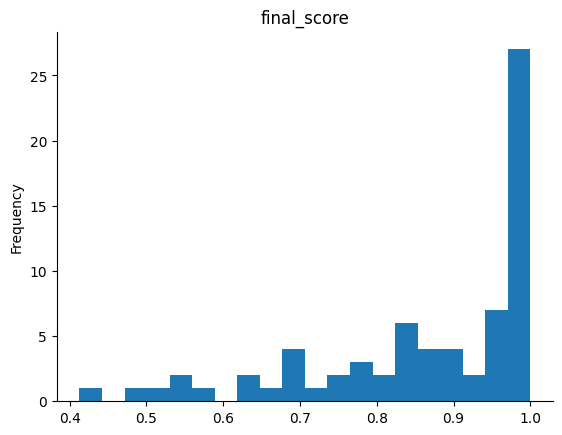

In [ ]:
# visualing the histogram of the final version
from matplotlib import pyplot as plt
scaled_measures['scaled_percentage_of_green'].plot(kind='hist', bins=20, title='final_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# saving the rsult to a file
scaled_measures.to_csv("scaled_measures.csv")